In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.info()
#No null values. 'Country' is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**EDA**

In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


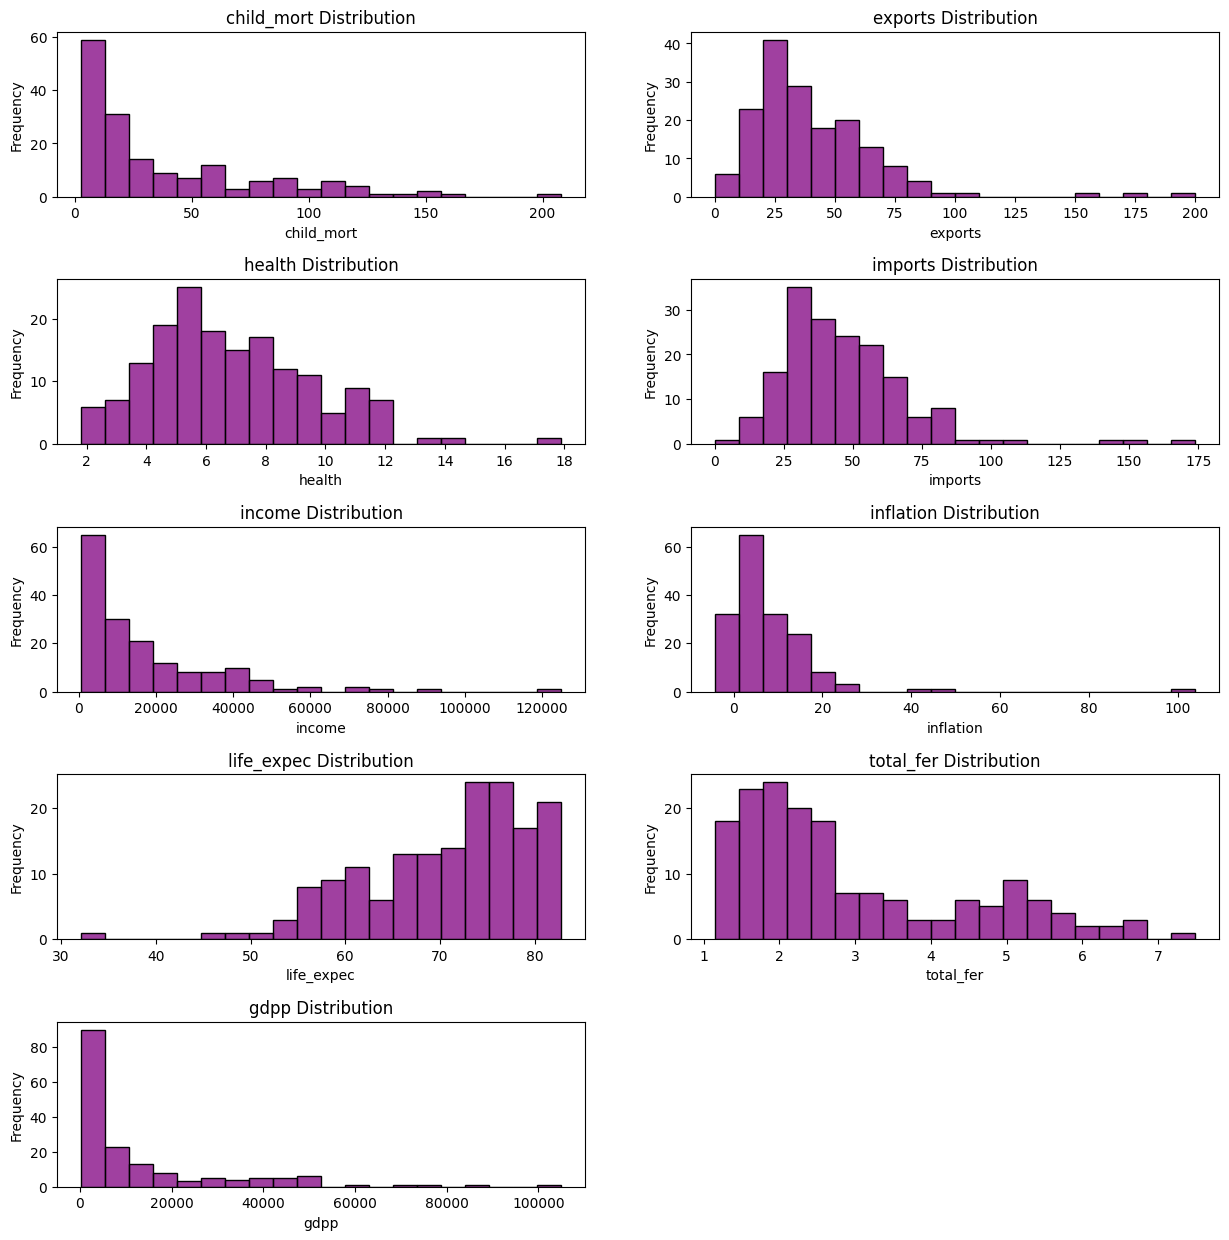

In [6]:
#Histogram
num_col = data.select_dtypes(include=['float64', 'int64']).columns
num_plot = len(num_col)
if num_plot%2==0:
  num_row=num_plot//2
else:
  num_row=num_plot//2+1

fig,axes = plt.subplots(num_row,2,figsize=(15,3*num_row))
fig.subplots_adjust(hspace=0.5)
axes=axes.flatten()

for i, column in enumerate(num_col):
  sns.histplot(data[column],bins=20,kde=False,color='purple',ax=axes[i])
  axes[i].set_title(f"{column} Distribution")
  axes[i].set_xlabel(column)
  axes[i].set_ylabel("Frequency")

for j in range(i+1,len(axes)):
  axes[j].axis("off")

plt.show()

<ipython-input-8-733b0dcecccd>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


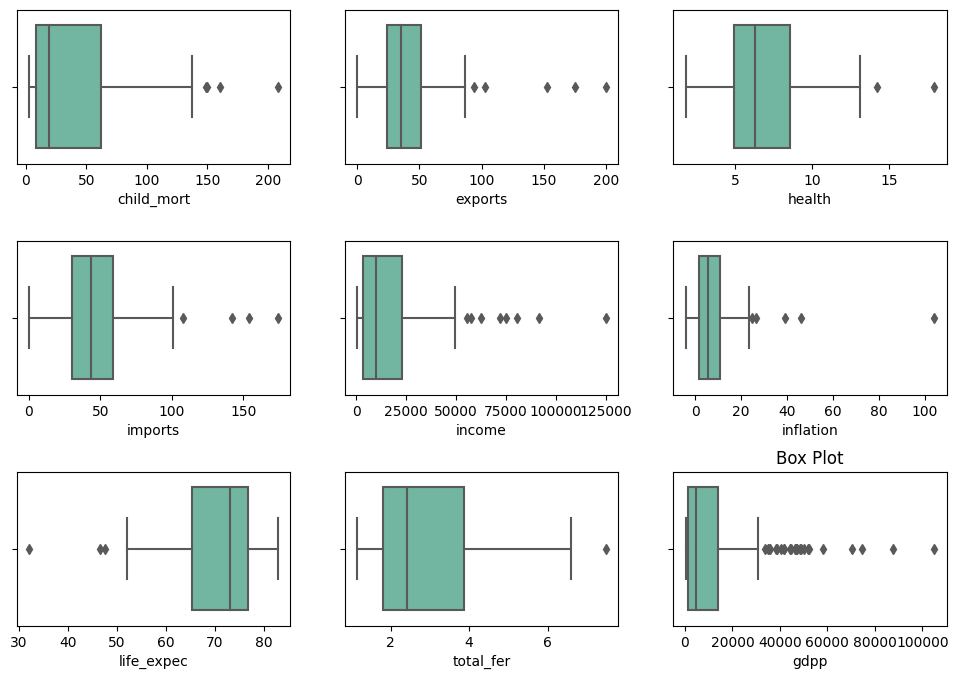

In [8]:
#Box Plot to see outliers
num_col = data.select_dtypes(include=['float64', 'int64'])
plt.subplots(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(num_col):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=num_col[column],orient='h',palette='Set2')
plt.title('Box Plot')
plt.show()

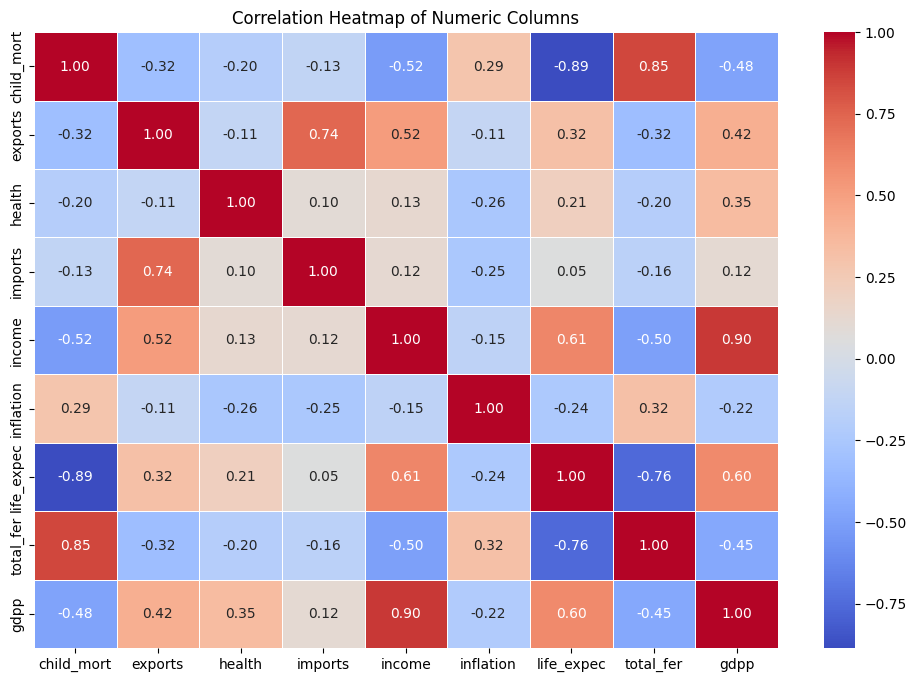

In [ ]:
#Heatmap
num_col = data.select_dtypes(include=['float64', 'int64'])
corr_mat=num_col.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f',linewidth=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

**Data Preprocessing**

In [4]:
#We can drop 'country' column
data1=data.drop(columns=['country'])
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scale=StandardScaler()
data2=scale.fit_transform(data1)
data_scale=pd.DataFrame(data2,columns=data1.columns)
print(data_scale.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


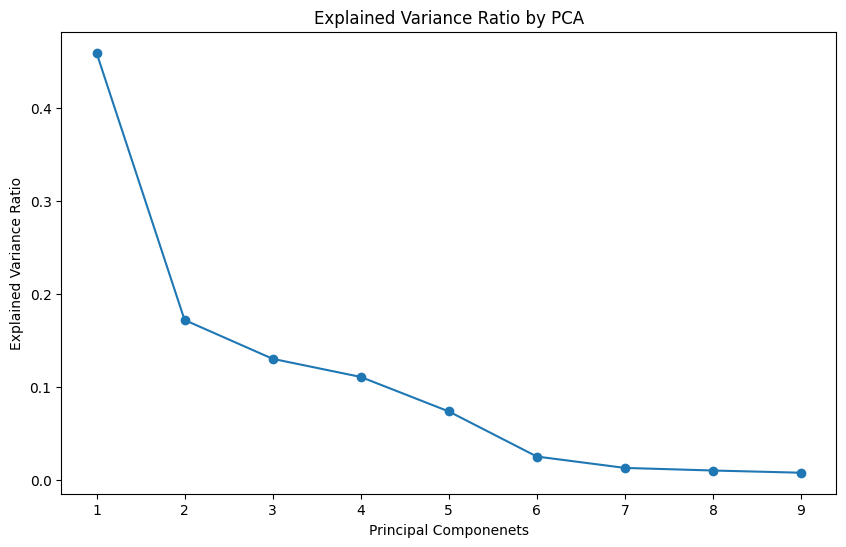

In [6]:
from sklearn.decomposition import PCA

pca=PCA()
data_pca=pca.fit_transform(data_scale)
exp_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_var_ratio)+1),exp_var_ratio,marker='o')
plt.title("Explained Variance Ratio by PCA")
plt.xlabel("Principal Componenets")
plt.ylabel("Explained Variance Ratio")
plt.show()

**We need only 6 paramters**

Optimal Components : 6


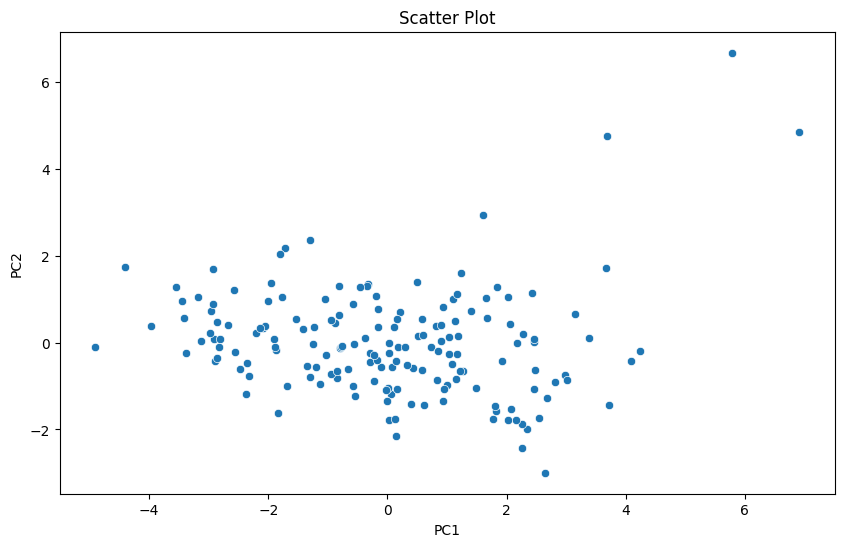

In [7]:
cumu_var_ratio = exp_var_ratio.cumsum()
optimal_comp = len(cumu_var_ratio[cumu_var_ratio<= 0.95])+1
print(f"Optimal Components : {optimal_comp}")

pca=PCA(n_components=optimal_comp)
data_pca=pca.fit_transform(data_scale)
data_pca=pd.DataFrame(data_pca,columns=[f'PC{i}' for i in range(1,optimal_comp +1)])

plt.figure(figsize=(10,6))
sns.scatterplot(x="PC1",y="PC2",data=data_pca)
plt.title('Scatter Plot')
plt.show()

org_col = list(df.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2], 'PC_4':pca.components_[3]})
attributes_pca


In [8]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919


In [10]:
col=list(data1.columns)
featurePca = pd.DataFrame({'Feature':col,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5]})
featurePca

,Feature,PC1,PC2,PC3,PC4,PC5,PC6
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779


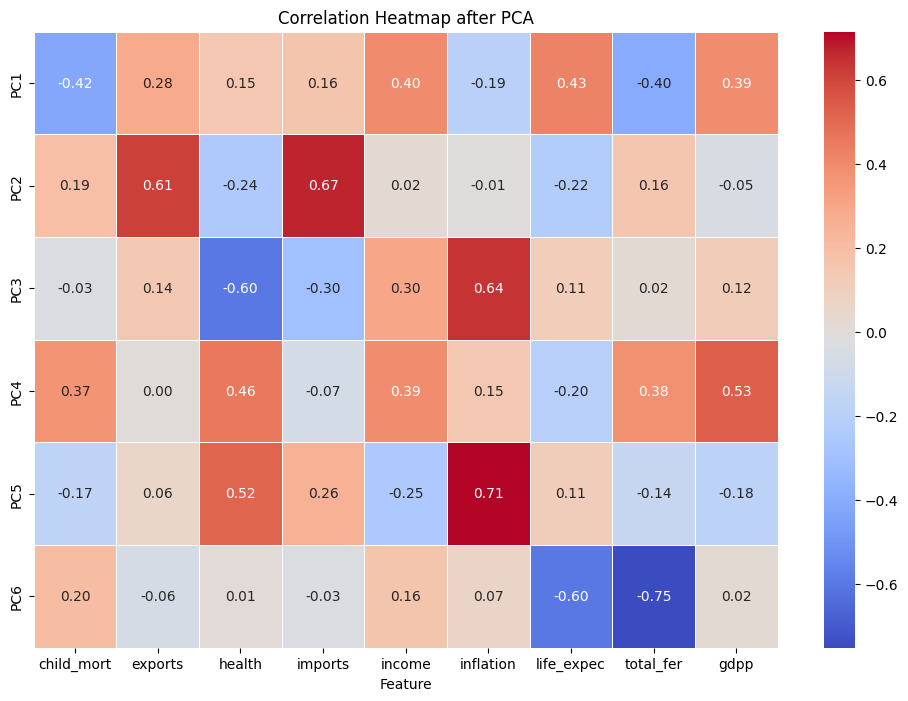

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(featurePca.set_index('Feature').T,annot=True,cmap='coolwarm',fmt='.3f',linewidths=.05)
plt.title('Correlation Heatmap after PCA')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

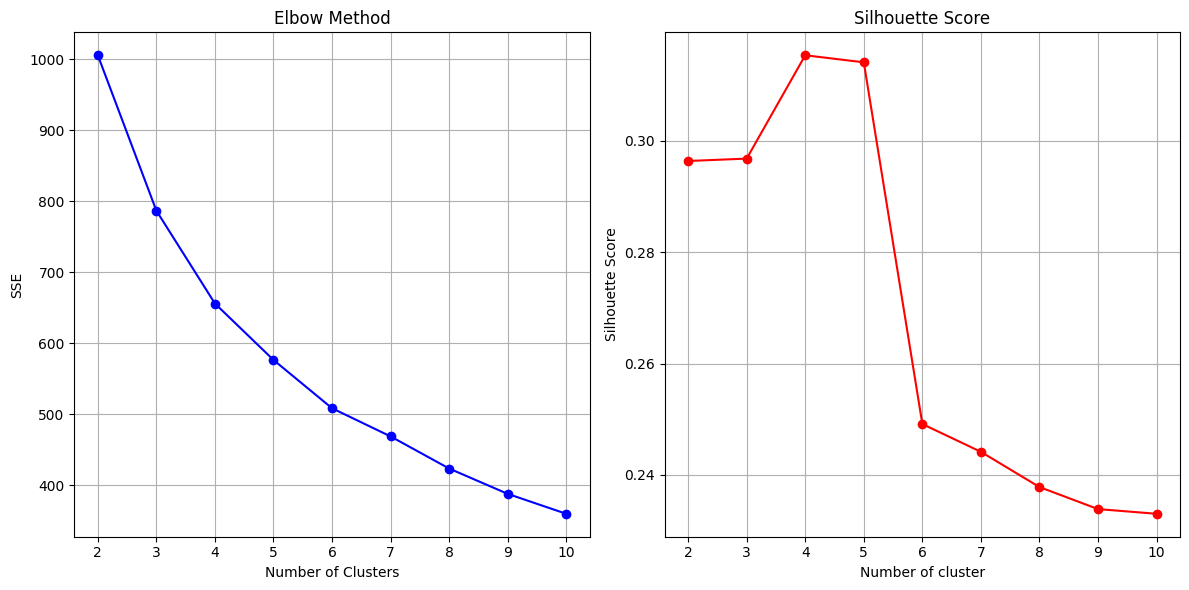

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

SSE = []
silhouette_scores = []
cluster_range=range(2,11)
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,max_iter=1000,random_state=42)
  kmeans.fit(data_pca)

  SSE.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(data_pca,kmeans.labels_))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(cluster_range,SSE,marker='o',linestyle='-',color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(cluster_range,silhouette_scores,marker='o',linestyle='-',color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

**Optimal clusters =4**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


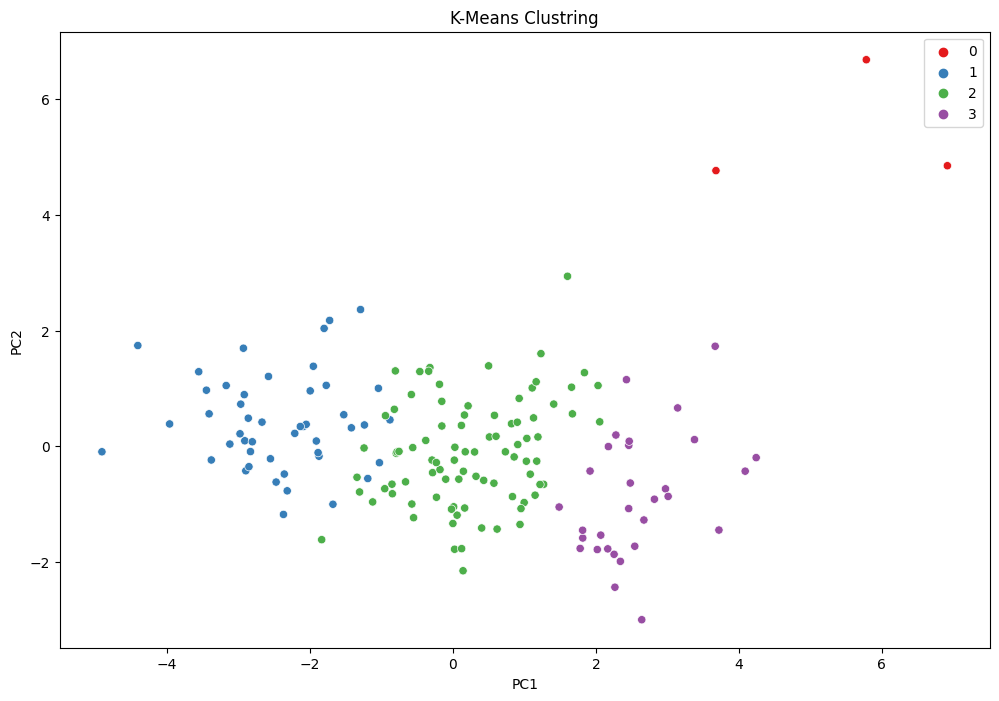

In [37]:
kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit_predict(data_pca)

plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1',y='PC2',hue=labels,data=data_pca,palette='Set1',legend='full')
plt.title('K-Means Clustring')
plt.show()


In [38]:
data_labeled = pd.concat([data,pd.Series(labels,name='Cluster')],axis=1)
data_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [39]:
data_labeled['Cluster'].value_counts()

2    87
1    47
3    30
0     3
Name: Cluster, dtype: int64

In [40]:
cluster_statistic = data_labeled.groupby('Cluster').agg(['mean','median','std']).transpose()
cluster_statistic

<ipython-input-40-ee3518526c2d>:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_statistic = data_labeled.groupby('Cluster').agg(['mean','median','std']).transpose()


Cluster                       0            1             2             3
child_mort mean        4.133333    92.961702     21.389655      4.953333
           median      2.800000    90.200000     18.100000      4.200000
           std         2.309401    33.375229     13.821462      2.159140
exports    mean      176.000000    29.151277     41.290678     45.826667
           median    175.000000    23.800000     37.700000     44.250000
           std        23.515952    18.160597     19.523129     21.736255
health     mean        6.793333     6.388511      6.235862      9.168667
           median      7.770000     5.660000      5.980000      9.535000
           std         2.492877     2.662015      2.158742      3.266299
imports    mean      156.666667    42.323404     48.038689     39.736667
           median    154.000000    40.300000     49.200000     35.000000
           std        16.165808    17.732741     20.083366     17.455134
income     mean    64033.333333  3942.404255  12968.620690  45250.000000
           median  72100.000000  1870.000000  10500.000000  40550.000000
           std     32460.642836  5641.790360   8870.376775  19785.308900
inflation  mean        2.468000    12.019681      7.413460      2.742200
           median      3.620000     8.920000      5.730000      1.190000
           std         2.179718    15.509958      7.808165      4.266366
life_expec mean       81.433333    59.187234     72.935632     80.376667
           median     81.300000    59.500000     73.800000     80.400000
           std         1.205543     6.443521      3.947474      1.440231
total_fer  mean        1.380000     5.008085      2.286552      1.795333
           median      1.360000     5.060000      2.200000      1.865000
           std         0.240624     1.041382      0.696392      0.369293
gdpp       mean    57566.666667  1922.382979   6919.103448  43333.333333
           median  46600.000000   897.000000   5020.000000  41850.000000
           std     43011.665084  2956.103925   5453.932294  15040.114942

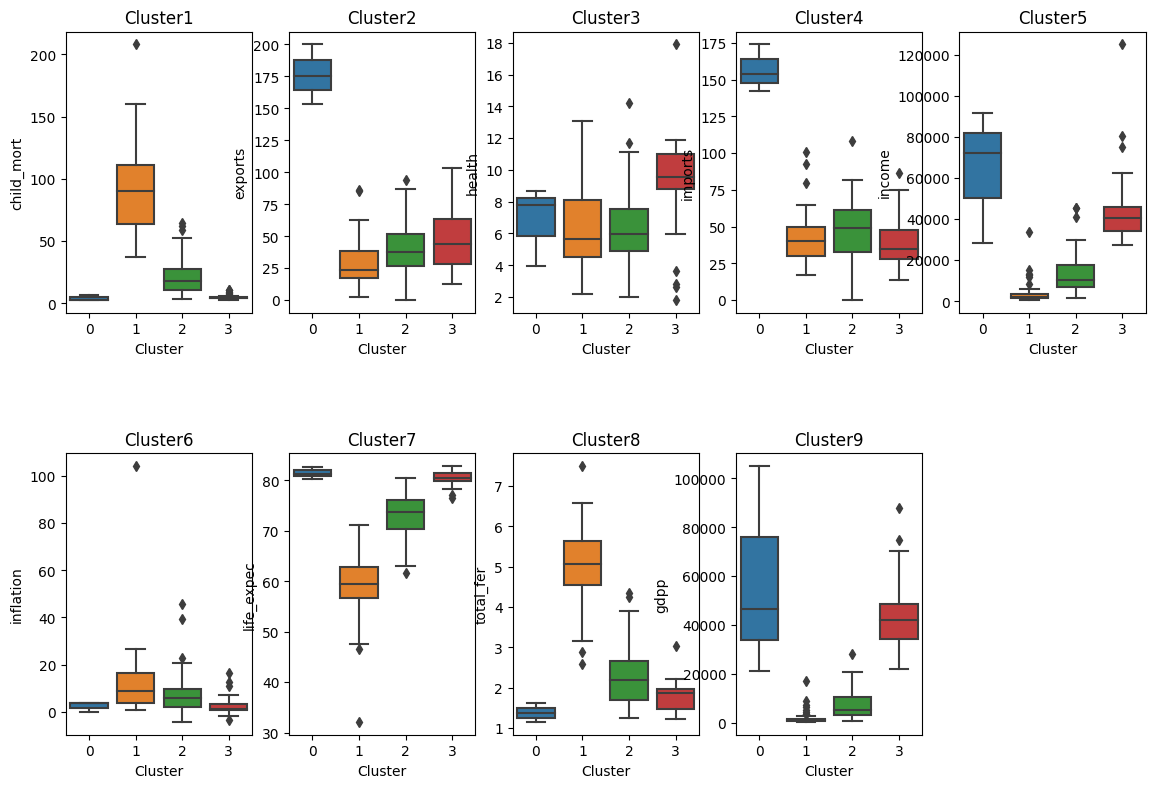

In [60]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.0001,bottom=0.001,hspace=0.5)
for i,column in enumerate(data1):
  plt.subplot(2,5,i+1)
  sns.boxplot(x='Cluster',y=column,data=data_labeled)
  plt.title(f'Cluster{i+1}')

plt.show()

In [66]:
for k in range(4):
  sample=data_labeled[data_labeled['Cluster']==k].head()
  print(sample)


        country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  Cluster  
91         81.3       1.63  105000        0  
98         80.3       1.36   21100        0  
133        82.7       1.15   46600        0  
         country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2     10.0    7.58     44.9    1610      9.440   
3         Angola       119.0     62.3    2.85     42.9    5900     22.400   
17         Benin       111.0     23.8    4.10     37.2    1820      0.885   
21      Botswana        52.5     43.6    8.30     51.3   13300      8.920   
25  Burkina Faso       116.0     19.2    6.74     29.6    1430      6.810   

    life_expec  total_fer  gdpp  Cluster  
0    